### International Gang

Members:   

          Aram Shojaei

          Ahmed Shahhat
          
          Nguyen Xuan Tung
          
          Pu Yin
    

### Forth set of exercise data visualization with t-SNE and clustering with DBSCAN

### Package

In [1]:
import time
import warnings
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot
from matplotlib.ticker import NullFormatter
from collections import OrderedDict
%matplotlib inline


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.cluster import k_means
from sklearn.datasets import load_digits

from itertools import cycle, islice
from mpl_toolkits.mplot3d import Axes3D

Loading the dataset

In [2]:
data = np.loadtxt( 'data_t-SNE_310101_d5_R100_e1_N800.dat')
n = data.shape[0]
print(data)
print(n)

[[-8.30650e+04  2.95210e+04  6.88150e+04 -1.00340e+05 -2.92350e+04]
 [-1.10304e+05  3.85450e+04  6.85190e+04 -1.15776e+05 -4.62870e+04]
 [-8.89080e+04  3.14180e+04  6.91740e+04 -1.07023e+05 -3.01200e+04]
 ...
 [-4.08300e+04 -6.09670e+04 -7.61340e+04 -3.09400e+03 -8.51600e+03]
 [-8.66300e+03  3.48560e+04  7.26890e+04 -4.85300e+04 -1.15000e+02]
 [ 1.53830e+04 -3.13700e+04 -5.09380e+04  3.39710e+04  8.42700e+03]]
800


C:\Users\ADMIN\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


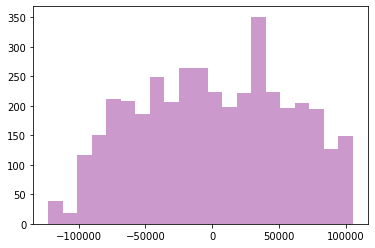

In [3]:
sns.distplot(data, color='purple', kde=False)
plt.show()


Figure of the dataset where 10% belongs to cluster “0” (red), the
next 30% to cluster “1” (green) and the last 60% to cluster “2” (blue). The green cluster is
linked to the blue one. 

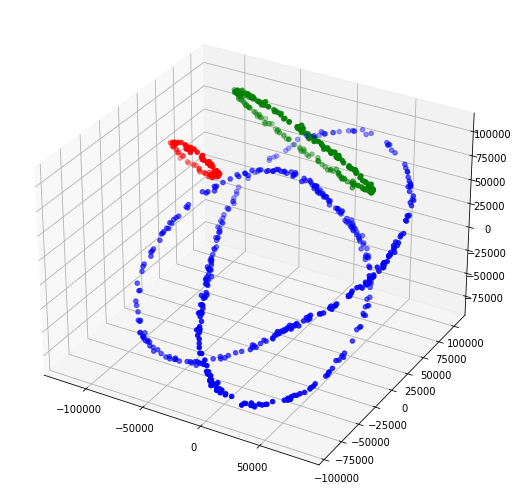

In [8]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(data[:,0], data[:,1], data[:,2])
ax.scatter(data[:80, 0], data[:80, 1], data[:80, 2], c="r")
ax.scatter(data[80:320, 0], data[80:320, 1],data[80:320, 2], c="g")
ax.scatter(data[320:, 0], data[320:, 1],data[320:, 2], c="b")
plt.savefig("Data represents the manifolds.jpg")
plt.show()
plt.close()

### t-SNE algorithm

#### We applied the t-SNE with 4 different perplextities (5, 30, 50, 100)

Data embedded for 3D 

In [5]:
data_embedded1 = TSNE(n_components=3, perplexity=5).fit_transform(data)
data_embedded1.shape

data_embedded2 = TSNE(n_components=3, perplexity=30).fit_transform(data)
data_embedded2.shape

data_embedded3 = TSNE(n_components=3, perplexity=50).fit_transform(data)
data_embedded3.shape

data_embedded4 = TSNE(n_components=3, perplexity=100).fit_transform(data)
data_embedded4.shape

(800, 3)

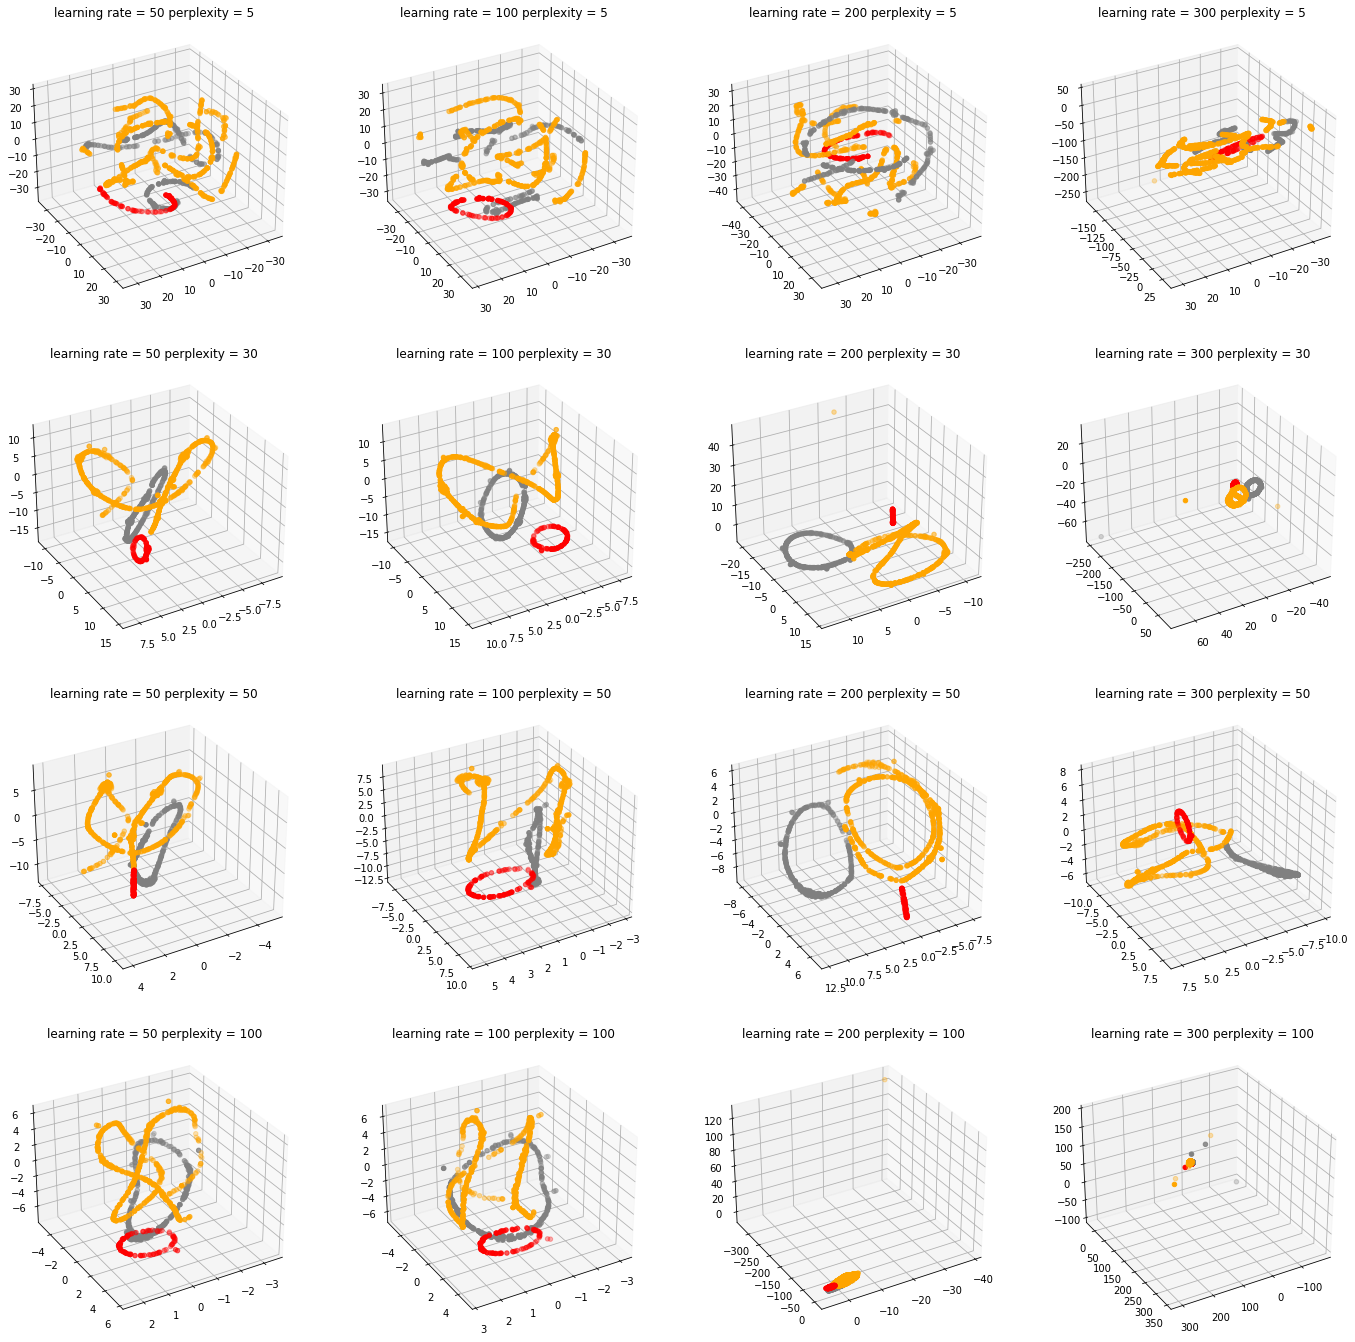

In [7]:
perplexities   = [ 5,  30,  50, 100]
learning_rates = [50, 100, 200, 300]
frac1 = 0.1
frac2 = 0.3

n_components = 3
nr = len(perplexities)
nc = len(learning_rates)

fig = plt.figure(figsize=(6*nc,6*nr))

for i in range(nr):
    for j in range(nc):
        ax   = fig.add_subplot(nr, nc, i*nc+j+1, projection='3d')
        perp = perplexities[i]
        lr   = learning_rates[j]
        tsne = TSNE(n_components=n_components, init='random', perplexity=perp, 
                             early_exaggeration=10.0, learning_rate=lr, 
                             n_iter=5000, random_state=0)
        data_transf = tsne.fit_transform(data)
        
        x = data_transf[:,0]
        y = data_transf[:,1]
        z = data_transf[:,2]
        
        N  = len(x)
        N1 = int(N*frac1)
        N2 = int(N*frac2)
        N3 = int(N*(1-frac1-frac2))
        
        x1 = x[:N1]
        x2 = x[N1:(N1+N2)]
        x3 = x[(N1+N2):]
        y1 = y[:N1]
        y2 = y[N1:(N1+N2)]
        y3 = y[(N1+N2):]
        z1 = z[:N1]
        z2 = z[N1:(N1+N2)]
        z3 = z[(N1+N2):]
        
        ax.scatter(x1,y1,z1, c='r')
        ax.scatter(x3,y3,z3, c='orange')
        ax.scatter(x2,y2,z2, c='gray')
        ax.set_title("learning rate = "+str(lr)+" perplexity = "+str(perp))
        ax.view_init(30, 60)

We can see that for the 3D algorithm we still have a nice convergence for the data represented. Although it still has some bad results due to learning rate and perplexity

Data embedded for 2D

In [10]:
data_embedded1 = TSNE(n_components=2, perplexity=5).fit_transform(data)
data_embedded1.shape

data_embedded2 = TSNE(n_components=2, perplexity=30).fit_transform(data)
data_embedded2.shape

data_embedded3 = TSNE(n_components=2, perplexity=50).fit_transform(data)
data_embedded3.shape

data_embedded4 = TSNE(n_components=2, perplexity=100).fit_transform(data)
data_embedded4.shape

(800, 2)

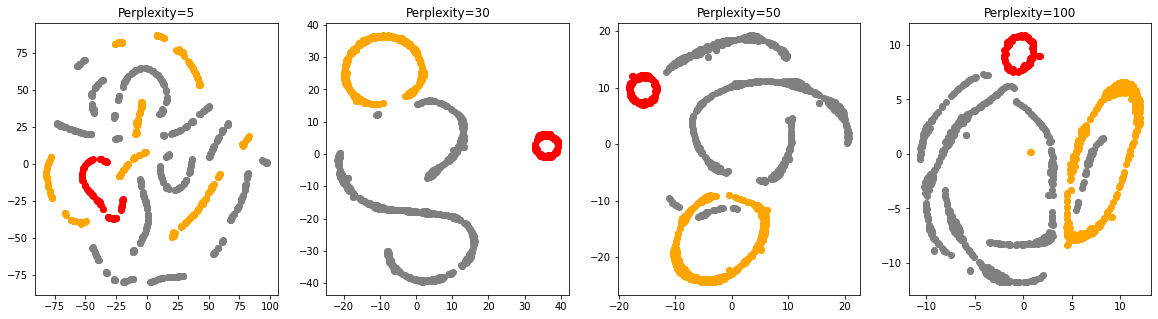

In [11]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20, 5)
axs[0].scatter(data_embedded1[:80, 0], data_embedded1[:80, 1], c="r")
axs[0].scatter(data_embedded1[80:320, 0], data_embedded1[80:320, 1], c="orange")
axs[0].scatter(data_embedded1[320:, 0], data_embedded1[320:, 1], c="gray")
axs[0].set_title("Perplexity=5")

axs[1].scatter(data_embedded2[:80, 0], data_embedded2[:80, 1], c="r")
axs[1].scatter(data_embedded2[80:320, 0], data_embedded2[80:320, 1], c="orange")
axs[1].scatter(data_embedded2[320:, 0], data_embedded2[320:, 1], c="gray")
axs[1].set_title("Perplexity=30")

axs[2].scatter(data_embedded3[:80, 0], data_embedded3[:80, 1], c="r")
axs[2].scatter(data_embedded3[80:320, 0], data_embedded3[80:320, 1], c="orange")
axs[2].scatter(data_embedded3[320:, 0], data_embedded3[320:, 1], c="gray")
axs[2].set_title("Perplexity=50")

axs[3].scatter(data_embedded4[:80, 0], data_embedded4[:80, 1], c="r")
axs[3].scatter(data_embedded4[80:320, 0], data_embedded4[80:320, 1], c="orange")
axs[3].scatter(data_embedded4[320:, 0], data_embedded4[320:, 1], c="gray")
axs[3].set_title("Perplexity=100")

plt.savefig("different perplexity.jpg")
plt.show()
plt.close()

We calculate the average distance between each point in the data set and its 10 nearest neighbors 

In [13]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

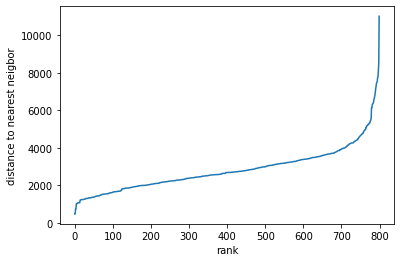

In [14]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('rank')
plt.ylabel('distance to nearest neigbor' )
plt.plot(distances)
plt.savefig("Average distance between each point1.jpg")
plt.show()
plt.close()

### DBSCAN algorithm

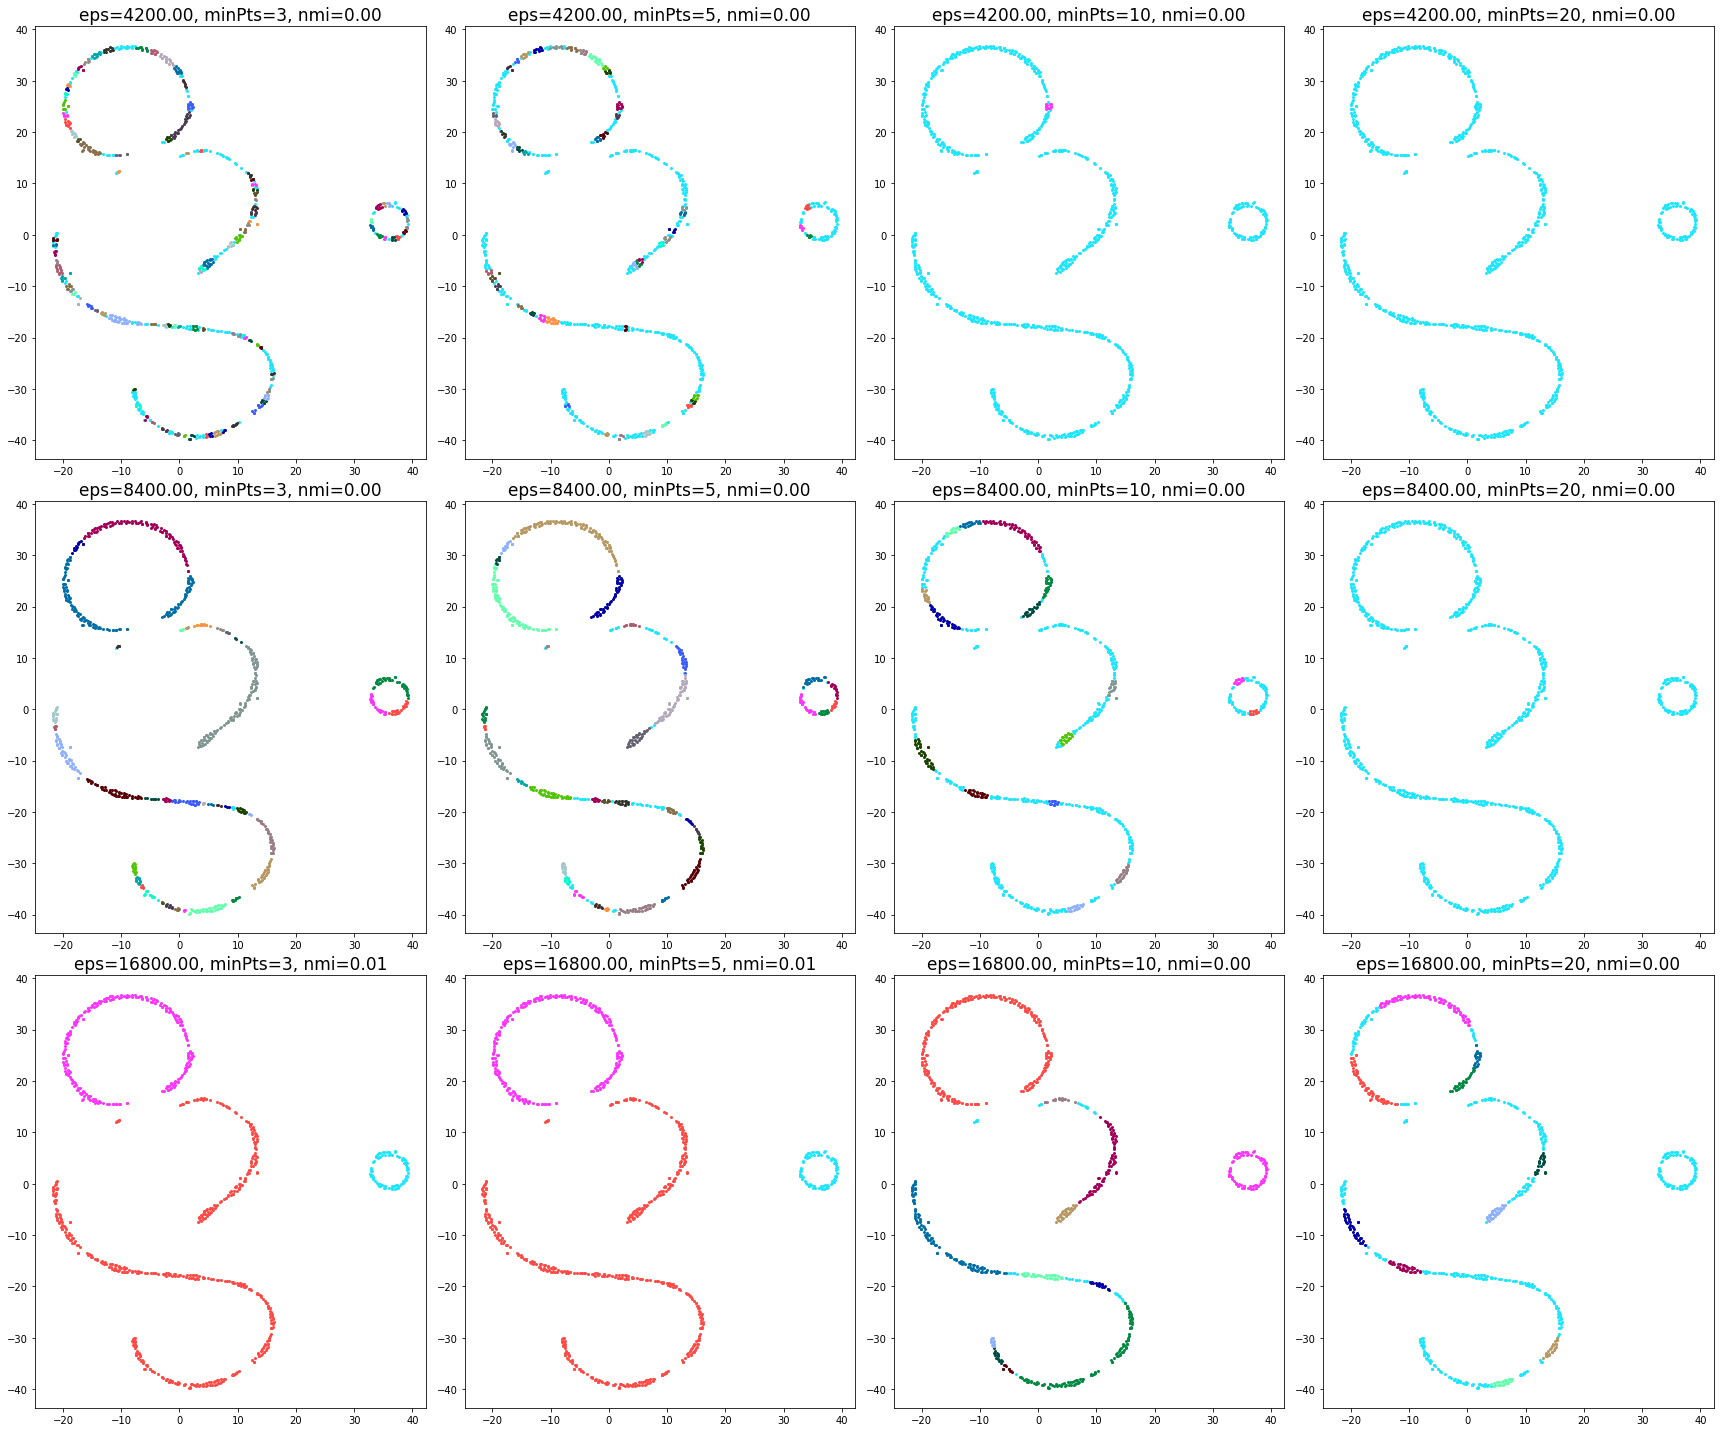

In [16]:
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
def plotting_ax(X, y, ax):
    ''' plotting function '''
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu) 
        # pos is a mask for take all
        # points which have label yu
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)], s=4)
def clustering(y):
    ''' 
    Finds position of labels and returns a 
    dictionary of cluster labels to data indices. 
    '''
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    ''' Measures the entropy of a cluster '''
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    '''
    Computes normalized mutual information: 
    where y_true and y_pred are both clustering assignments
    '''
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)
# ------------------------------------- DBSCAN ---------------------------------------- #
eps = [4200, 8400, 16800]
min_sample = [3, 5, 10, 20]

# True labels
ytrue = np.zeros(len(data))
ytrue[0:1] = 2 # second cluster
ytrue[1:] = 3 # third cluster

fig, ax = plt.subplots(3,4,figsize=(24, 20))

for i, e in enumerate(eps):
    for j, min_samples in enumerate(min_sample):
        
        model = DBSCAN(eps=e, min_samples=min_samples)
        model.fit(data)
        # return the labels, i.e. the cluster indecies, for
        # each point in data
        y = model.labels_         
        
        nmi = NMI(y, ytrue)
        
        plotting_ax(data_embedded2, y , ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(e , min_samples, nmi)
                         , fontsize = 17)
        
        
plt.tight_layout(h_pad=0.5)
plt.savefig("DBSCAN1.jpg")
plt.show()
plt.close()
        

For this dataset, it seems that for value of eps greater than 16000 and minPts less than 6 we have a perfect match (nmi =0.01) between the real labels and the clustering method.

### ------------------------------------------------------------------------------------------------

### Aim: generate strings of L bits;
### in each string, one out of M patterns is enforced

In [17]:
# random seed for reproducibility
np.random.seed(12345)
L=36
def pattern(X,l0,l1):
    """ zeros in the positions of list l0,
        ones in the positions of list l1"""
    X[l0] = 0
    X[l1] = 1
    return X
xx = np.random.randint(0,2,size=L)
print(xx)
xx = pattern(xx,[0,1,2,3,4,5,6,7],[-8,-7,-6,-5,-4,-3,-2,-1])
print(xx)

[0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


In [18]:
# random seed for reproducibility
np.random.seed(12345)
N=400
L=36
M=5
y = np.zeros(N).astype(int)
x = np.random.randint(0,2,size=(N,L))

for n in range(4):
    print(x[n])
print("")

for n in range(N):
    y[n] = np.random.randint(0,M) # numpy: 0 to M-1, if M
        
    if y[n]==0:
        x[n] = pattern(x[n],[3,4,14,16,22,25,27,32],[0,5,7,9,12,15,26,30])
    elif y[n]==1:
        x[n] = pattern(x[n],[0,11,12,23,24,28,33],[2,4,6,25,26,30,31])
    elif y[n]==2:
        x[n] = pattern(x[n],[0,5,8,15,19,34],[5,9,10,15,26,29])
    elif y[n]==3:
        x[n] = pattern(x[n],[6,7,16,24,26],[3,5,13,16,27])
    elif y[n]==4:
        x[n] = pattern(x[n],[5,12,22,28],[4,5,30,34])
            
for n in range(30):
    print(x[n],y[n])

[0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1]
[1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0]
[0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1]

[0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1] 1
[1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0] 3
[0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0] 2
[0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1] 3
[0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1] 2
[0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0] 4
[0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0] 3
[0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0] 1
[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0] 4
[1 1 1 0 0 1 0 1 1 

In [19]:
# create directory DATA
!mkdir DATA

str0 = f'M{M}_N{N}'
print(str0)
fname='DATA/x_'+str0+'.csv'
np.savetxt(fname,x,delimiter=" ",fmt='%i')
fname='DATA/y_'+str0+'.csv'
np.savetxt(fname,y,fmt='%i')

M5_N400


A subdirectory or file DATA already exists.


In [20]:
str0 = "M5_N400"
fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x= np.loadtxt(fnamex,dtype=float)
yy = np.loadtxt(fnamey, dtype=float)

print(x)
print(yy)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 1.]]
[1. 3. 2. 3. 2. 4. 3. 1. 4. 0. 3. 4. 0. 3. 4. 1. 4. 3. 1. 3. 2. 2. 0. 3.
 4. 3. 2. 2. 3. 2. 1. 2. 0. 1. 2. 0. 0. 4. 1. 4. 4. 0. 3. 0. 1. 4. 3. 3.
 2. 3. 4. 0. 0. 4. 4. 4. 4. 3. 4. 2. 3. 3. 1. 1. 4. 2. 4. 0. 0. 3. 2. 2.
 3. 2. 0. 1. 0. 2. 3. 2. 0. 2. 4. 0. 4. 2. 1. 3. 1. 0. 0. 3. 3. 1. 4. 4.
 2. 2. 0. 0. 3. 1. 0. 0. 4. 3. 1. 4. 1. 0. 1. 0. 0. 1. 0. 3. 2. 4. 2. 0.
 2. 4. 1. 3. 0. 4. 0. 2. 3. 2. 2. 1. 2. 2. 2. 0. 0. 1. 2. 3. 4. 2. 4. 4.
 0. 3. 3. 0. 1. 0. 0. 0. 4. 4. 3. 4. 2. 3. 1. 1. 1. 0. 0. 1. 3. 1. 3. 1.
 4. 4. 0. 3. 0. 4. 4. 1. 0. 1. 2. 3. 1. 1. 3. 2. 2. 2. 3. 4. 3. 0. 0. 2.
 3. 3. 0. 2. 3. 0. 3. 3. 4. 4. 4. 3. 4. 0. 3. 1. 4. 1. 3. 3. 4. 4. 4. 0.
 3. 4. 0. 1. 2. 2. 1. 3. 1. 4. 4. 3. 4. 4. 2. 3. 1. 1. 1. 3. 3. 1. 0. 1.
 0. 4. 2. 2. 0. 2. 3. 0. 3. 2. 3. 4. 1. 3. 1. 0. 1. 3. 4. 2. 1. 2. 0. 0.
 2. 2. 3. 2. 0. 2. 0. 3. 1. 0. 4. 3. 4. 4

### t-SNE algorithm

Embedded data in 2D with perplexity = 25

In [21]:
x_embedded = TSNE(n_components=2, perplexity=25).fit_transform(x)
x_embedded.shape

(400, 2)

C:\Users\ADMIN\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


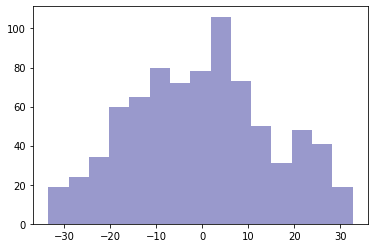

In [22]:
sns.distplot(x_embedded, color='navy', kde=False)
plt.show()


Plot the graph 

Each label corresponds to a specific enforced subsequence. Where y=0 (black) is the best distinguishable one and y=4 (yellow) is the most difficult to distinguish from the others.

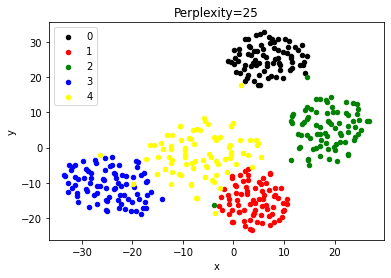

<Figure size 432x288 with 0 Axes>

In [23]:
df = DataFrame(dict(x=x_embedded[:,0], y=x_embedded[:,1], label=y))
colors = {0:'black', 1:'red', 2:'green', 3:'blue', 4:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key,
               color=colors[key], title="Perplexity=25")
pyplot.show()
plt.savefig("dataframe with 25 per.jpg")
plt.show()
plt.close()

Testing the dataset with t-SNE of 1000 perplexity

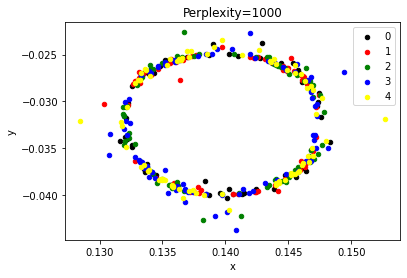

<Figure size 432x288 with 0 Axes>

In [24]:
x_embedded1000 = TSNE(n_components=2, perplexity=1000).fit_transform(x)

df = DataFrame(dict(x=x_embedded1000[:,0], y=x_embedded1000[:,1], label=y))
colors = {0:'black', 1:'red', 2:'green', 3:'blue', 4:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key,
               color=colors[key], title="Perplexity=1000")
pyplot.show()
plt.savefig("dataframe with 1000 per.jpg")
plt.show()
plt.close()

The perplexity 25 view shows the basic topology correctly, but again t-SNE greatly exaggerates the size of the smaller group of points. At perplexity 1000, there’s a new phenomenon: the outer group becomes a circle, as the plot tries to depict the fact that all its points are about the same distance from the inner group.

We calculate the average distance between each point in the data set and its 10 nearest neighbors 

In [28]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

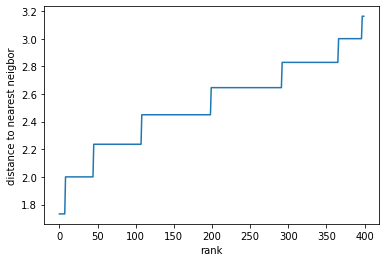

In [29]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('rank')
plt.ylabel('distance to nearest neigbor' )
plt.plot(distances)
plt.savefig("Average distance between each point2.jpg")
plt.show()
plt.close()

### DBSCAN algorithm

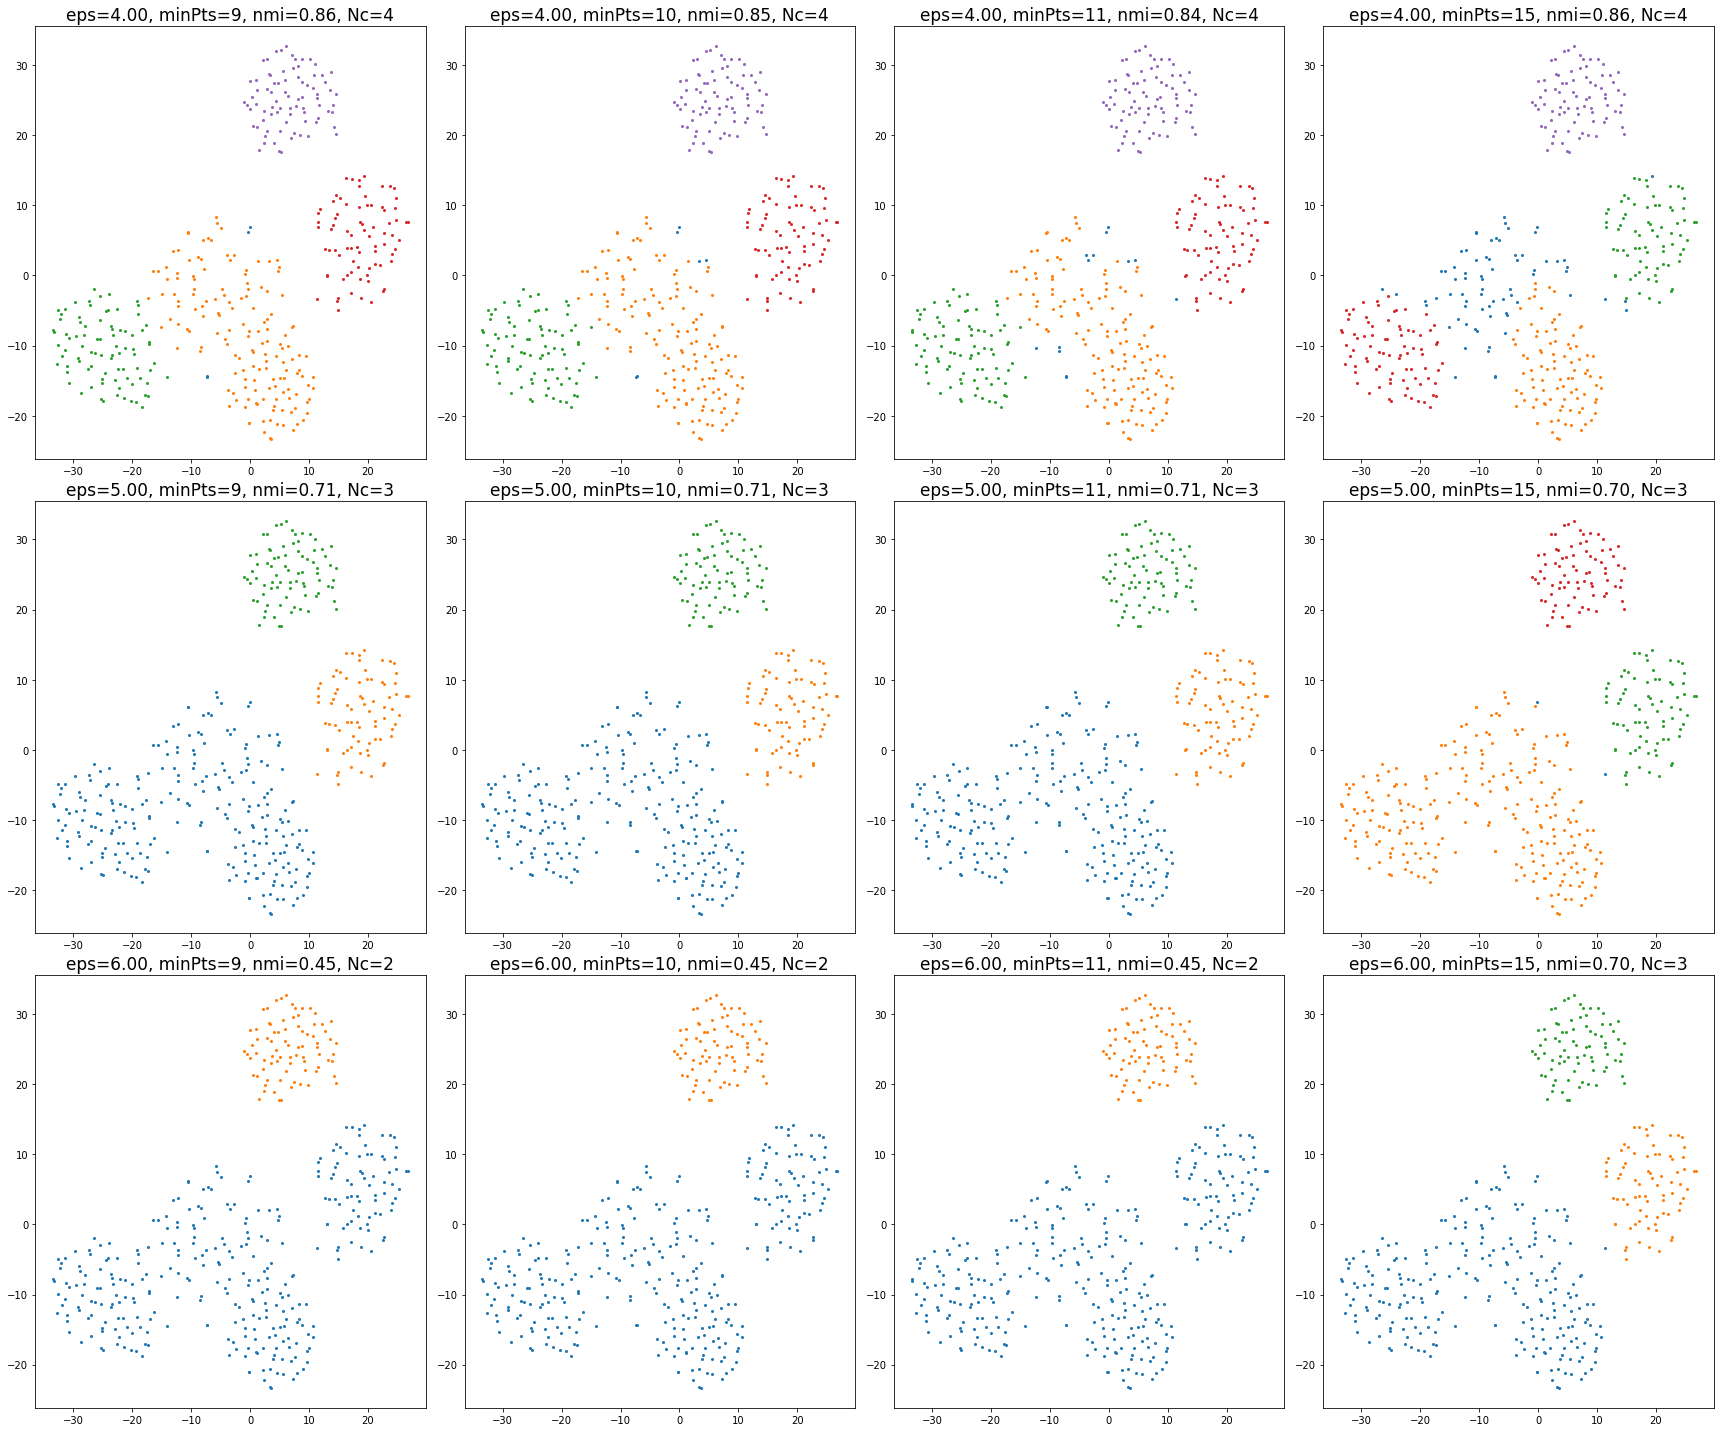

In [31]:
def plotting_ax(X, y, ax):
    ''' plotting function '''
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu) 
        # pos is a mask for take all
        # points which have label yu
        ax.scatter(X[pos,0], X[pos,1], s=4)
def clustering(y):
    ''' 
    Finds position of labels and returns a 
    dictionary of cluster labels to data indices. 
    '''
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    ''' Measures the entropy of a cluster '''
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    '''
    Computes normalized mutual information: 
    where y_true and y_pred are both clustering assignments
    '''
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)
# ------------------------------------- DBSCAN ---------------------------------------- #
eps = [4,5,6]
min_sample = [9,10,11,15]

# True labels
ytrue = yy

fig, ax = plt.subplots(3,4,figsize=(24, 20))

for i, e in enumerate(eps):
    for j, min_samples in enumerate(min_sample):
        
        model = DBSCAN(eps=e, min_samples=min_samples)
        model.fit(x_embedded)
        # return the labels, i.e. the cluster indecies, for
        # each point in data
        y = model.labels_  
        labels=model.labels_
        Nc = len(set(labels)) - (1 if -1 in labels else 0)
        nmi = NMI(y, ytrue)
        plotting_ax(x_embedded, y , ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f, Nc=%i'%(e , min_samples, nmi, Nc)
                         , fontsize = 17)
        
        
plt.tight_layout(h_pad=0.5)

plt.savefig("DBSCAN2.jpg")
plt.show()
plt.close()